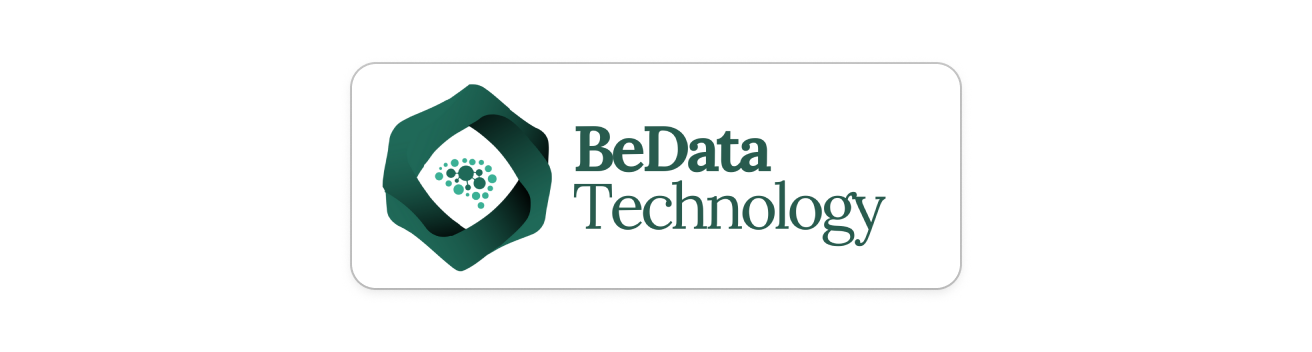

# Preparation

## Import Library

In [16]:
%pip install wordcloud emoji transformers torch

# Import Libraries
import pandas as pd
import re
import emoji
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
from transformers import pipeline
 

## Load Data

In [17]:
# Load the YouTube comments dataset
url = "https://raw.githubusercontent.com/Rizukaf-id/dataset-challenge/main/Apakah_Investasi_Saham_dan_Bitcoin_Haram-Ustad_Felix_Siauw.csv"
df = pd.read_csv(url)

print("Columns:", df.columns.tolist())
df.head()


Columns: ['author', 'text', 'time', 'votes', 'replies']


,author,text,time,votes,replies
0,@leon.hartono,"Part 1: Negara Agamis, Tapi Kok Tingkat Korups...",4 bulan yang lalu,293,62.0
1,@hierlan174,"Ini jawaban buat saya, saya berbisnis dari 202...",4 bulan yang lalu,962,22.0
2,@mitraprimadaya6773,Ayoooo siapa yang ke Channel ini karena ada us...,4 bulan yang lalu,501,18.0
3,@kundiharto,[00:29] Kesalahan utama dalam bisnis\n[01:00] ...,4 bulan yang lalu,662,36.0
4,@adamtv417,Krjaku cm sopir truk trailer Disby dan q Islam...,4 bulan yang lalu,482,30.0


In [18]:
df['text'].head()

,text
0,"Part 1: Negara Agamis, Tapi Kok Tingkat Korups..."
1,"Ini jawaban buat saya, saya berbisnis dari 202..."
2,Ayoooo siapa yang ke Channel ini karena ada us...
3,[00:29] Kesalahan utama dalam bisnis\n[01:00] ...
4,Krjaku cm sopir truk trailer Disby dan q Islam...


# Text cleaning & normalization

## Slang Dict

In [19]:
# Simple Indonesian slang dictionary
slang_map = {
    "gk": "gak", "ga": "gak", "gak": "tidak", "kagak": "tidak",
    "nggak": "tidak", "enggak": "tidak", "tdk": "tidak", "tdk": "tidak",
    "yg": "yang", "yng": "yang", "y": "yang",
    "bgt": "banget", "bngt": "banget", "bgtt": "banget",
    "bgtbgt": "banget", "bget": "banget",
    "anjir": "anjing", "anjay": "anjing", "anj": "anjing",
    "blm": "belum", "belom": "belum",
    "dr": "dari", "drpd": "daripada",
    "dg": "dengan", "dgn": "dengan",
    "sm": "sama", "sma": "sama",
    "smua": "semua", "sgala": "segala",
    "klo": "kalau", "kl": "kalau", "kalo": "kalau",
    "skr": "sekarang", "skrg": "sekarang",
    "bkn": "bukan", "bukn": "bukan",
    "bodo": "bodoh", "bodoamat": "bodoh amat", "@": "di", "abis": "habis", 
    "ad": "ada", "adlh": "adalah", "afaik": "as far as i know", "ahaha": "haha", 
    "aj": "saja", "ajep-ajep": "dunia gemerlap", "ak": "saya", "akika": "aku", "akkoh": "aku",
    "akuwh": "aku", "alay": "norak", "alow": "halo", "ambilin": "ambilkan", "ancur": "hancur", 
    "anjrit": "anjing", "anter": "antar", "ap2": "apa-apa", "apasih": "apa sih", "apes": "sial", 
    "aps": "apa", "aq": "saya", "aquwh": "aku", "asbun": "asal bunyi", "aseekk": "asyik", "asekk": "asyik",
    "asem": "asam", "aspal": "asli tetapi palsu", "astul": "asal tulis", "ato": "atau", "au ah": "tidak mau tahu", "awak": "saya", "ay": "sayang", "ayank": "sayang", "b4": "sebelum", "bakalan": "akan", "bandes": "bantuan desa", "bangedh": "banget", "banpol": "bantuan polisi", "banpur": "bantuan tempur", "basbang": "basi", "bcanda": "bercanda", "bdg": "bandung", "begajulan": "nakal", "beliin": "belikan", "bencong": "banci", "bentar": "sebentar", "ber3": "bertiga", "beresin": "membereskan", "bete": "bosan", "beud": "banget", "bg": "abang", "bgmn": "bagaimana", "bgt": "banget", "bijimane": "bagaimana", "bintal": "bimbingan mental", "bkl": "akan", "bknnya": "bukannya", "blegug": "bodoh", "blh": "boleh", "bln": "bulan", "blum": "belum", "bnci": "benci", "bnran": "yang benar", "bodor": "lucu", "bokap": "ayah", "boker": "buang air besar", "bokis": "bohong", "boljug": "boleh juga", "bonek": "bocah nekat", "boyeh": "boleh", "br": "baru", "brg": "bareng", "bro": "saudara laki-laki", "bru": "baru", "bs": "bisa", "bsen": "bosan", "bt": "buat", "btw": "ngomong-ngomong", "buaya": "tidak setia", "bubbu": "tidur", "bubu": "tidur", "bumil": "ibu hamil", "bw": "bawa", "bwt": "buat", "byk": "banyak", "byrin": "bayarkan", "cabal": "sabar", "cadas": "keren", "calo": "makelar", "can": "belum", "capcus": "pergi", "caper": "cari perhatian", "ce": "cewek", "cekal": "cegah tangkal", "cemen": "penakut", "cengengesan": "tertawa", "cepet": "cepat", "cew": "cewek", "chuyunk": "sayang", "cimeng": "ganja", "cipika cipiki": "cium pipi kanan cium pipi kiri", "ciyh": "sih", "ckepp": "cakep", "ckp": "cakep", "cmiiw": "correct me if i'm wrong", "cmpur": "campur", "cong": "banci", "conlok": "cinta lokasi", "cowwyy": "maaf", "cp": "siapa", "cpe": "capek", "cppe": "capek", "cucok": "cocok", "cuex": "cuek", "cumi": "Cuma miscall", "cups": "culun", "curanmor": "pencurian kendaraan bermotor", "curcol": "curahan hati colongan", "cwek": "cewek", "cyin": "cinta", "d": "di", "dah": "deh", "dapet": "dapat", "de": "adik", "dek": "adik", "demen": "suka", "deyh": "deh", "dgn": "dengan", "diancurin": "dihancurkan", "dimaafin": "dimaafkan", "dimintak": "diminta", "disono": "di sana", "dket": "dekat", "dkk": "dan kawan-kawan", "dll": "dan lain-lain", "dlu": "dulu", "dngn": "dengan", "dodol": "bodoh", "doku": "uang", "dongs": "dong", "dpt": "dapat", "dri": "dari", "drmn": "darimana", "drtd": "dari tadi", "dst": "dan seterusnya", "dtg": "datang", "duh": "aduh", "duren": "durian", "ed": "edisi", "egp": "emang gue pikirin", "eke": "aku", "elu": "kamu", "emangnya": "memangnya", "emng": "memang", "endak": "tidak", "enggak": "tidak", "envy": "iri", "ex": "mantan", "fax": "facsimile", "fifo": "first in first out", "folbek": "follow back", "fyi": "sebagai informasi", "gaada": "tidak ada uang", "gag": "tidak", "gaje": "tidak jelas", "gak papa": "tidak apa-apa", "gan": "juragan", "gaptek": "gagap teknologi", "gatek": "gagap teknologi", "gawe": "kerja", "gbs": "tidak bisa", "gebetan": "orang yang disuka", "geje": "tidak jelas", "gepeng": "gelandangan dan pengemis", "ghiy": "lagi", "gile": "gila", "gimana": "bagaimana", "gino": "gigi nongol", "githu": "gitu", "gj": "tidak jelas", "gmana": "bagaimana", "gn": "begini", "goblok": "bodoh", "golput": "golongan putih", "gowes": "mengayuh sepeda", "gpny": "tidak punya", "gr": "gede rasa", "gretongan": "gratisan", "gtau": "tidak tahu", "gua": "saya", "guoblok": "goblok", "gw": "saya", "ha": "tertawa", "haha": "tertawa", "hallow": "halo", "hankam": "pertahanan dan keamanan", "hehe": "he", "helo": "halo", "hey": "hai", "hlm": "halaman", "hny": "hanya", "hoax": "isu bohong", "hr": "hari", "hrus": "harus", "hubdar": "perhubungan darat", "huff": "mengeluh", "hum": "rumah", "humz": "rumah", "ilang": "hilang", "ilfil": "tidak suka", "imho": "in my humble opinion", "imoetz": "imut", "item": "hitam", "itungan": "hitungan", "iye": "iya", "ja": "saja", "jadiin": "jadi", "jaim": "jaga image", "jayus": "tidak lucu", "jdi": "jadi", "jem": "jam", "jga": "juga", "jgnkan": "jangankan", "jir": "anjing", "jln": "jalan", "jomblo": "tidak punya pacar", "jubir": "juru bicara", "jutek": "galak", "k": "ke", "kab": "kabupaten", "kabor": "kabur", "kacrut": "kacau", "kadiv": "kepala divisi", "kagak": "tidak", "kalo": "kalau", "kampret": "sialan", "kamtibmas": "keamanan dan ketertiban masyarakat", "kamuwh": "kamu", "kanwil": "kantor wilayah", "karna": "karena", "kasubbag": "kepala subbagian", "katrok": "kampungan", "kayanya": "kayaknya", "kbr": "kabar", "kdu": "harus", "kec": "kecamatan", "kejurnas": "kejuaraan nasional", "kekeuh": "keras kepala", "kel": "kelurahan", "kemaren": "kemarin", "kepengen": "mau", "kepingin": "mau", "kepsek": "kepala sekolah", "kesbang": "kesatuan bangsa", "kesra": "kesejahteraan rakyat", "ketrima": "diterima", "kgiatan": "kegiatan", "kibul": "bohong", "kimpoi": "kawin", "kl": "kalau", "klianz": "kalian", "kloter": "kelompok terbang", "klw": "kalau", "km": "kamu", "kmps": "kampus", "kmrn": "kemarin", "knal": "kenal", "knp": "kenapa", "kodya": "kota madya", "komdis": "komisi disiplin", "komsov": "komunis sovyet", "kongkow": "kumpul bareng teman-teman", "kopdar": "kopi darat", "korup": "korupsi", "kpn": "kapan", "krenz": "keren", "krm": "kirim", "kt": "kita", "ktmu": "ketemu", "ktr": "kantor", "kuper": "kurang pergaulan", "kw": "imitasi", "kyk": "seperti", "la": "lah", "lam": "salam", "lamp": "lampiran", "lanud": "landasan udara", "latgab": "latihan gabungan", "lebay": "berlebihan", "leh": "boleh", "lelet": "lambat", "lemot": "lambat", "lgi": "lagi", "lgsg": "langsung", "liat": "lihat", "litbang": "penelitian dan pengembangan", "lmyn": "lumayan", "lo": "kamu", "loe": "kamu", "lola": "lambat berfikir", "louph": "cinta", "low": "kalau", "lp": "lupa", "luber": "langsung, umum, bebas, dan rahasia", "luchuw": "lucu", "lum": "belum", "luthu": "lucu", "lwn": "lawan", "maacih": "terima kasih", "mabal": "bolos", "macem": "macam", "macih": "masih", "maem": "makan", "magabut": "makan gaji buta", "maho": "homo", "mak jang": "kaget", "maksain": "memaksa", "malem": "malam", "mam": "makan", "maneh": "kamu", "maniez": "manis", "mao": "mau", "masukin": "masukkan", "melu": "ikut", "mepet": "dekat sekali", "mgu": "minggu", "migas": "minyak dan gas bumi", "mikol": "minuman beralkohol", "miras": "minuman keras", "mlah": "malah", "mngkn": "mungkin", "mo": "mau", "mokad": "mati", "moso": "masa", "mpe": "sampai", "msk": "masuk", "mslh": "masalah", "mt": "makan teman", "mubes": "musyawarah besar", "mulu": "melulu", "mumpung": "selagi", "munas": "musyawarah nasional", "muntaber": "muntah dan berak", "musti": "mesti", "muupz": "maaf", "mw": "now watching", "n": "dan", "nanam": "menanam", "nanya": "bertanya", "napa": "kenapa", "napi": "narapidana", "napza": "narkotika, alkohol, psikotropika, dan zat adiktif ", "narkoba": "narkotika, psikotropika, dan obat terlarang", "nasgor": "nasi goreng", "nda": "tidak", "ndiri": "sendiri", "ne": "ini", "nekolin": "neokolonialisme", "nembak": "menyatakan cinta", "ngabuburit": "menunggu berbuka puasa", "ngaku": "mengaku", "ngambil": "mengambil", "nganggur": "tidak punya pekerjaan", "ngapah": "kenapa", "ngaret": "terlambat", "ngasih": "memberikan", "ngebandel": "berbuat bandel", "ngegosip": "bergosip", "ngeklaim": "mengklaim", "ngeksis": "menjadi eksis", "ngeles": "berkilah", "ngelidur": "menggigau", "ngerampok": "merampok", "ngga": "tidak", "ngibul": "berbohong", "ngiler": "mau", "ngiri": "iri", "ngisiin": "mengisikan", "ngmng": "bicara", "ngomong": "bicara", "ngubek2": "mencari-cari", "ngurus": "mengurus", "nie": "ini", "nih": "ini", "niyh": "nih", "nmr": "nomor", "nntn": "nonton", "nobar": "nonton bareng", "np": "now playing", "ntar": "nanti", "ntn": "nonton", "numpuk": "bertumpuk", "nutupin": "menutupi", "nyari": "mencari", "nyekar": "menyekar", "nyicil": "mencicil", "nyoblos": "mencoblos", "nyokap": "ibu", "ogah": "tidak mau", "ol": "online", "ongkir": "ongkos kirim", "oot": "out of topic", "org2": "orang-orang", "ortu": "orang tua", "otda": "otonomi daerah", "otw": "on the way, sedang di jalan", "pacal": "pacar", "pake": "pakai", "pala": "kepala", "pansus": "panitia khusus", "parpol": "partai politik", "pasutri": "pasangan suami istri", "pd": "pada", "pede": "percaya diri", "pelatnas": "pemusatan latihan nasional", "pemda": "pemerintah daerah", "pemkot": "pemerintah kota", "pemred": "pemimpin redaksi", "penjas": "pendidikan jasmani", "perda": "peraturan daerah", "perhatiin": "perhatikan", "pesenan": "pesanan", "pgang": "pegang", "pi": "tapi", "pilkada": "pemilihan kepala daerah", "pisan": "sangat", "pk": "penjahat kelamin", "plg": "paling", "pmrnth": "pemerintah", "polantas": "polisi lalu lintas", "ponpes": "pondok pesantren", "pp": "pulang pergi", "prg": "pergi", "prnh": "pernah", "psen": "pesan", "pst": "pasti", "pswt": "pesawat", "pw": "posisi nyaman", "qmu": "kamu", "rakor": "rapat koordinasi", "ranmor": "kendaraan bermotor", "re": "reply", "ref": "referensi", "rehab": "rehabilitasi", "rempong": "sulit", "repp": "balas", "restik": "reserse narkotika", "rhs": "rahasia", "rmh": "rumah", "ru": "baru", "ruko": "rumah toko", "rusunawa": "rumah susun sewa", "ruz": "terus", "saia": "saya", "salting": "salah tingkah", "sampe": "sampai", "samsek": "sama sekali", "sapose": "siapa", "satpam": "satuan pengamanan", "sbb": "sebagai berikut", "sbh": "sebuah", "sbnrny": "sebenarnya", "scr": "secara", "sdgkn": "sedangkan", "sdkt": "sedikit", "se7": "setuju", "sebelas dua belas": "mirip", "sembako": "sembilan bahan pokok", "sempet": "sempat", "sendratari": "seni drama tari", "sgt": "sangat", "shg": "sehingga", "siech": "sih", "sikon": "situasi dan kondisi", "sinetron": "sinema elektronik", "siramin": "siramkan", "sj": "saja", "skalian": "sekalian", "sklh": "sekolah", "skt": "sakit", "slesai": "selesai", "sll": "selalu", "slma": "selama", "slsai": "selesai", "smpt": "sempat", "smw": "semua", "sndiri": "sendiri", "soljum": "sholat jumat", "songong": "sombong", "sory": "maaf", "sosek": "sosial-ekonomi", "sotoy": "sok tahu", "spa": "siapa", "sppa": "siapa", "spt": "seperti", "srtfkt": "sertifikat", "stiap": "setiap", "stlh": "setelah", "suk": "masuk", "sumpek": "sempit", "syg": "sayang", "t4": "tempat", "tajir": "kaya", "tau": "tahu", "taw": "tahu", "td": "tadi", "tdk": "tidak", "teh": "kakak perempuan", "telat": "terlambat", "telmi": "telat berpikir", "temen": "teman", "tengil": "menyebalkan", "tepar": "terkapar", "tggu": "tunggu", "tgu": "tunggu", "thankz": "terima kasih", "thn": "tahun", "tilang": "bukti pelanggaran", "tipiwan": "TvOne", "tks": "terima kasih", "tlp": "telepon", "tls": "tulis", "tmbah": "tambah", "tmen2": "teman-teman", "tmpah": "tumpah", "tmpt": "tempat", "tngu": "tunggu", "tnyta": "ternyata", "tokai": "tai", "toserba": "toko serba ada", "tpi": "tapi", "trdhulu": "terdahulu", "trima": "terima kasih", "trm": "terima", "trs": "terus", "trutama": "terutama", "ts": "penulis", "tst": "tahu sama tahu", "ttg": "tentang", "tuch": "tuh", "tuir": "tua", "tw": "tahu", "u": "kamu", "ud": "sudah", "udah": "sudah", "ujg": "ujung", "ul": "ulangan", "unyu": "lucu", "uplot": "unggah", "urang": "saya", "usah": "perlu", "utk": "untuk", "valas": "valuta asing", "w/": "dengan", "wadir": "wakil direktur", "wamil": "wajib militer", "warkop": "warung kopi", "warteg": "warung tegal", "wat": "buat", "wkt": "waktu", "wtf": "what the fuck", "xixixi": "tertawa", "ya": "iya", "yap": "iya", "yaudah": "ya sudah", "yawdah": "ya sudah", "yg": "yang", "yl": "yang lain", "yo": "iya", "yowes": "ya sudah", "yup": "iya", "7an": "tujuan", "ababil": "abg labil", "acc": "accord", "adlah": "adalah", "adoh": "aduh", "aha": "tertawa", "aing": "saya", "aja": "saja", "ajj": "saja", "aka": "dikenal juga sebagai", "akko": "aku", "akku": "aku", "akyu": "aku", "aljasa": "asal jadi saja", "ama": "sama", "ambl": "ambil", "anjir": "anjing", "ank": "anak", "ap": "apa", "apaan": "apa", "ape": "apa", "aplot": "unggah", "apva": "apa", "aqu": "aku", "asap": "sesegera mungkin", "aseek": "asyik", "asek": "asyik", "aseknya": "asyiknya", "asoy": "asyik", "astrojim": "astagfirullahaladzim", "ath": "kalau begitu", "atuh": "kalau begitu", "ava": "avatar", "aws": "awas", "ayang": "sayang", "ayok": "ayo", "bacot": "banyak bicara", "bales": "balas", "bangdes": "pembangunan desa", "bangkotan": "tua", "banpres": "bantuan presiden", "bansarkas": "bantuan sarana kesehatan", "bazis": "badan amal, zakat, infak, dan sedekah", "bcoz": "karena", "beb": "sayang", "bejibun": "banyak", "belom": "belum", "bener": "benar", "ber2": "berdua", "berdikari": "berdiri di atas kaki sendiri", "bet": "banget", "beti": "beda tipis", "beut": "banget", "bgd": "banget", "bgs": "bagus", "bhubu": "tidur", "bimbuluh": "bimbingan dan penyuluhan", "bisi": "kalau-kalau", "bkn": "bukan", "bl": "beli", "blg": "bilang", "blm": "belum", "bls": "balas", "bnchi": "benci", "bngung": "bingung", "bnyk": "banyak", "bohay": "badan aduhai", "bokep": "porno", "bokin": "pacar", "bole": "boleh", "bolot": "bodoh", "bonyok": "ayah ibu", "bpk": "bapak", "brb": "segera kembali", "brngkt": "berangkat", "brp": "berapa", "brur": "saudara laki-laki", "bsa": "bisa", "bsk": "besok", "bu_bu": "tidur", "bubarin": "bubarkan", "buber": "buka bersama", "bujubune": "luar biasa", "buser": "buru sergap", "bwhn": "bawahan", "byar": "bayar", "byr": "bayar", "c8": "chat", "cabut": "pergi", "caem": "cakep", "cama-cama": "sama-sama", "cangcut": "celana dalam", "cape": "capek", "caur": "jelek", "cekak": "tidak ada uang", "cekidot": "coba lihat", "cemplungin": "cemplungkan", "ceper": "pendek", "ceu": "kakak perempuan", "cewe": "cewek", "cibuk": "sibuk", "cin": "cinta", "ciye": "cie", "ckck": "ck", "clbk": "cinta lama bersemi kembali", "cmpr": "campur", "cnenk": "senang", "congor": "mulut", "cow": "cowok", "coz": "karena", "cpa": "siapa", "gokil": "gila", "gombal": "suka merayu", "gpl": "tidak pakai lama", "gpp": "tidak apa-apa", "gretong": "gratis", "gt": "begitu", "gtw": "tidak tahu", "gue": "saya", "guys": "teman-teman", "gws": "cepat sembuh", "haghaghag": "tertawa", "hakhak": "tertawa", "handak": "bahan peledak", "hansip": "pertahanan sipil", "hellow": "halo", "helow": "halo", "hi": "hai", "hlng": "hilang", "hnya": "hanya", "houm": "rumah", "hrs": "harus", "hubad": "hubungan angkatan darat", "hubla": "perhubungan laut", "huft": "mengeluh", "humas": "hubungan masyarakat", "idk": "saya tidak tahu", "ilfeel": "tidak suka", "imba": "jago sekali", "imoet": "imut", "info": "informasi", "itung": "hitung", "isengin": "bercanda", "iyala": "iya lah", "iyo": "iya", "jablay": "jarang dibelai", "jadul": "jaman dulu", "jancuk": "anjing", "jd": "jadi", "jdikan": "jadikan", "jg": "juga", "jgn": "jangan", "jijay": "jijik", "jkt": "jakarta", "jnj": "janji", "jth": "jatuh", "jurdil": "jujur adil", "jwb": "jawab", "ka": "kakak", "kabag": "kepala bagian", "kacian": "kasihan", "kadit": "kepala direktorat", "kaga": "tidak", "kaka": "kakak", "kamtib": "keamanan dan ketertiban", "kamuh": "kamu", "kamyu": "kamu", "kapt": "kapten", "kasat": "kepala satuan", "kasubbid": "kepala subbidang", "kau": "kamu", "kbar": "kabar", "kcian": "kasihan", "keburu": "terlanjur", "kedubes": "kedutaan besar", "kek": "seperti", "keknya": "kayaknya", "keliatan": "kelihatan", "keneh": "masih", "kepikiran": "terpikirkan", "kepo": "mau tahu urusan orang", "kere": "tidak punya uang", "kesian": "kasihan", "ketauan": "ketahuan", "keukeuh": "keras kepala", "khan": "kan", "kibus": "kaki busuk", "kk": "kakak", "klian": "kalian", "klo": "kalau", "kluarga": "keluarga", "klwrga": "keluarga", "kmari": "kemari", "kmpus": "kampus", "kn": "kan", "knl": "kenal", "knpa": "kenapa", "kog": "kok", "kompi": "komputer", "komtiong": "komunis Tiongkok", "konjen": "konsulat jenderal", "koq": "kok", "kpd": "kepada", "kptsan": "keputusan", "krik": "garing", "krn": "karena", "ktauan": "ketahuan", "ktny": "katanya", "kudu": "harus", "kuq": "kok", "ky": "seperti", "kykny": "kayanya", "laka": "kecelakaan", "lambreta": "lambat", "lansia": "lanjut usia", "lapas": "lembaga pemasyarakatan", "lbur": "libur", "lekong": "laki-laki", "lg": "lagi", "lgkp": "lengkap", "lht": "lihat", "linmas": "perlindungan masyarakat", "lmyan": "lumayan", "lngkp": "lengkap", "loch": "loh", "lol": "tertawa", "lom": "belum", "loupz": "cinta", "lowh": "kamu", "lu": "kamu", "luchu": "lucu", "luff": "cinta", "luph": "cinta", "lw": "kamu", "lwt": "lewat", "maaciw": "terima kasih", "mabes": "markas besar", "macem-macem": "macam-macam", "madesu": "masa depan suram", "maen": "main", "mahatma": "maju sehat bersama", "mak": "ibu", "makasih": "terima kasih", "malah": "bahkan", "malu2in": "memalukan", "mamz": "makan", "manies": "manis", "mantep": "mantap", "markus": "makelar kasus", "mba": "mbak", "mending": "lebih baik", "mgkn": "mungkin", "mhn": "mohon", "miker": "minuman keras", "milis": "mailing list", "mksd": "maksud", "mls": "malas", "mnt": "minta", "moge": "motor gede", "mokat": "mati", "mosok": "masa", "msh": "masih", "mskpn": "meskipun", "msng2": "masing-masing", "muahal": "mahal", "muker": "musyawarah kerja", "mumet": "pusing", "muna": "munafik", "munaslub": "musyawarah nasional luar biasa", "musda": "musyawarah daerah", "muup": "maaf", "muuv": "maaf", "nal": "kenal", "nangis": "menangis", "naon": "apa", "napol": "narapidana politik", "naq": "anak", "narsis": "bangga pada diri sendiri", "nax": "anak", "ndak": "tidak", "ndut": "gendut", "nekolim": "neokolonialisme", "nelfon": "menelepon", "ngabis2in": "menghabiskan", "ngakak": "tertawa", "ngambek": "marah", "ngampus": "pergi ke kampus", "ngantri": "mengantri", "ngapain": "sedang apa", "ngaruh": "berpengaruh", "ngawur": "berbicara sembarangan", "ngeceng": "kumpul bareng-bareng", "ngeh": "sadar", "ngekos": "tinggal di kos", "ngelamar": "melamar", "ngeliat": "melihat", "ngemeng": "bicara terus-terusan", "ngerti": "mengerti", "nggak": "tidak", "ngikut": "ikut", "nginep": "menginap", "ngisi": "mengisi", "ngmg": "bicara", "ngocol": "lucu", "ngomongin": "membicarakan", "ngumpul": "berkumpul", "ni": "ini", "nyasar": "tersesat", "nyariin": "mencari", "nyiapin": "mempersiapkan", "nyiram": "menyiram", "nyok": "ayo", "o/": "oleh", "ok": "ok", "priksa": "periksa", "pro": "profesional", "psn": "pesan", "psti": "pasti", "puanas": "panas", "qmo": "kamu", "qt": "kita", "rame": "ramai", "raskin": "rakyat miskin", "red": "redaksi", "reg": "register", "rejeki": "rezeki", "renstra": "rencana strategis", "reskrim": "reserse kriminal", "sni": "sini", "somse": "sombong sekali", "sorry": "maaf", "sosbud": "sosial-budaya", "sospol": "sosial-politik", "sowry": "maaf", "spd": "sepeda", "sprti": "seperti", "spy": "supaya", "stelah": "setelah", "subbag": "subbagian", "sumbangin": "sumbangkan", "sy": "saya", "syp": "siapa", "tabanas": "tabungan pembangunan nasional", "tar": "nanti", "taun": "tahun", "tawh": "tahu", "tdi": "tadi", "te2p": "tetap", "tekor": "rugi", "telkom": "telekomunikasi", "telp": "telepon", "temen2": "teman-teman", "tengok": "menjenguk", "terbitin": "terbitkan", "tgl": "tanggal", "thanks": "terima kasih", "thd": "terhadap", "thx": "terima kasih", "tipi": "TV", "tkg": "tukang", "tll": "terlalu", "tlpn": "telepon", "tman": "teman", "tmbh": "tambah", "tmn2": "teman-teman", "tmph": "tumpah", "tnda": "tanda", "tnh": "tanah", "togel": "toto gelap", "tp": "tapi", "tq": "terima kasih", "trgntg": "tergantung", "trims": "terima kasih", "cb": "coba", "y": "ya", "munfik": "munafik", "reklamuk": "reklamasi", "sma": "sama", "tren": "trend", "ngehe": "kesal", "mz": "mas", "analisise": "analisis", "sadaar": "sadar", "sept": "september", "nmenarik": "menarik", "zonk": "bodoh", "rights": "benar", "simiskin": "miskin", "ngumpet": "sembunyi", "hardcore": "keras", "akhirx": "akhirnya", "solve": "solusi", "watuk": "batuk", "ngebully": "intimidasi", "masy": "masyarakat", "still": "masih", "tauk": "tahu", "mbual": "bual", "tioghoa": "tionghoa", "ngentotin": "senggama", "kentot": "senggama", "faktakta": "fakta", "sohib": "teman", "rubahnn": "rubah", "trlalu": "terlalu", "nyela": "cela", "heters": "pembenci", "nyembah": "sembah", "most": "paling", "ikon": "lambang", "light": "terang", "pndukung": "pendukung", "setting": "atur", "seting": "akting", "next": "lanjut", "waspadalah": "waspada", "gantengsaya": "ganteng", "parte": "partai", "nyerang": "serang", "nipu": "tipu", "ktipu": "tipu", "jentelmen": "berani", "buangbuang": "buang", "tsangka": "tersangka", "kurng": "kurang", "ista": "nista", "less": "kurang", "koar": "teriak", "paranoid": "takut", "problem": "masalah", "tahi": "kotoran", "tirani": "tiran", "tilep": "tilap", "happy": "bahagia", "tak": "tidak", "penertiban": "tertib", "uasai": "kuasa", "mnolak": "tolak", "trending": "trend", "taik": "tahi", "wkwkkw": "tertawa", "ahokncc": "ahok", "istaa": "nista", "benarjujur": "jujur", "mgkin": "mungkin"
}

# Load additional slang dictionary from CSV and merge with existing slang_map
try:
    slang_csv_url = "https://raw.githubusercontent.com/nasalsabila/kamus-alay/master/colloquial-indonesian-lexicon.csv"
    slang_df = pd.read_csv(slang_csv_url)
    
    # Create dictionary from CSV (slang -> formal)
    # Use lowercase for consistency
    csv_slang_map = dict(zip(
        slang_df["slang"].astype(str).str.lower().str.strip(),
        slang_df["formal"].astype(str).str.lower().str.strip()
    ))
    
    # Merge: CSV entries take precedence, but keep existing entries if CSV doesn't have them
    slang_map = {**slang_map, **csv_slang_map}
    
    print(f"Loaded {len(csv_slang_map)} slang entries from CSV")
    print(f"Total slang_map size: {len(slang_map)} entries")
except Exception as e:
    print(f"Warning: Could not load slang CSV. Using base dictionary only. Error: {e}")


Loaded 4330 slang entries from CSV
Total slang_map size: 5046 entries


## Normalize

In [20]:
url_pattern = re.compile(r"http\S+|www\.\S+", re.IGNORECASE)
non_alnum_pattern = re.compile(r"[^0-9a-zA-Z\s]+", re.UNICODE)
repeated_char_pattern = re.compile(r"(.)\1{2,}")  # 3+ of the same char -> 1


def normalize_slang(token: str) -> str:
    return slang_map.get(token, token)


def clean_text(text: str) -> str:
    if not isinstance(text, str):
        text = str(text)

    # Lowercase
    text = text.lower()

    # Remove URLs
    text = url_pattern.sub(" ", text)

    # Remove emojis
    try:
        text = emoji.replace_emoji(text, replace=" ")
    except AttributeError:
        # Fallback for older emoji versions
        text = emoji.get_emoji_regexp().sub(" ", text)

    # Remove non-alphanumeric (punctuation etc.)
    text = non_alnum_pattern.sub(" ", text)

    # Collapse repeated characters (e.g., "bangetttt" -> "banget")
    text = repeated_char_pattern.sub(r"\1", text)

    # Normalize whitespace
    text = re.sub(r"\s+", " ", text).strip()

    # Normalize Indonesian slang
    tokens = [normalize_slang(tok) for tok in text.split()]
    return " ".join(tokens)


# Apply cleaning
df["clean_text"] = df["text"].apply(clean_text)

df[["text", "clean_text"]].head()


,text,clean_text
0,"Part 1: Negara Agamis, Tapi Kok Tingkat Korups...",part 1 negara agamis tapi kok tingkat korupsi ...
1,"Ini jawaban buat saya, saya berbisnis dari 202...",ini jawaban buat saya saya berbisnis dari 2020...
2,Ayoooo siapa yang ke Channel ini karena ada us...,ayo siapa yang ke channel ini karena ada ust f...
3,[00:29] Kesalahan utama dalam bisnis\n[01:00] ...,00 29 kesalahan utama dalam bisnis 01 00 tujua...
4,Krjaku cm sopir truk trailer Disby dan q Islam...,krjaku cuma sopir truk trailer disby dan ku is...


# IndoBERT sentiment analysis

In [21]:
# Model: ayameRushia/indobert-base-uncased-finetuned-indonlu-smsa
sentiment_pipeline = pipeline(
    "sentiment-analysis",
    model="ayameRushia/indobert-base-uncased-finetuned-indonlu-smsa",
)


def map_sentiment_label(text: str) -> str:
    """Map raw model labels to Positif / Negatif / Netral."""
    if not isinstance(text, str) or not text.strip():
        return "Netral"

    # Truncate very long texts to a reasonable length for the model
    truncated = text[:512]
    result = sentiment_pipeline(truncated)[0]
    raw_label = result["label"].lower()

    if "pos" in raw_label:
        return "Positif"
    if "neg" in raw_label:
        return "Negatif"
    return "Netral"


df["sentiment_label"] = df["clean_text"].apply(map_sentiment_label)

# Quick sanity check of label distribution
df["sentiment_label"].value_counts()


Device set to use cpu


,count
sentiment_label,
Netral,1071


# Sanity Check

In [22]:
# 20 random samples for manual quality check

sample_20 = df[["text", "clean_text", "sentiment_label"]].sample(
    n=20, random_state=42
)
sample_20.reset_index(drop=True)


,text,clean_text,sentiment_label
0,Aamiin,amin,Netral
1,Pokok nya klo ad ufs sy tgok lah ini podcast.....,pokok nya kalo ada ufs saya tgok lah ini podca...,Netral
2,Senang sekali mendatangkan ustadz felix.,senang sekali mendatangkan ustadz felix,Netral
3,"Ustadz, kalau di Palembang mah bukan soal Ras,...",ustadz kalau di palembang mah bukan soal ras s...,Netral
4,Dubay mas beli mobil bisa menggunakan bitcoin,dubay mas beli mobil bisa menggunakan bitcoin,Netral
5,Aamiin YRA 🤲❤,amin yra,Netral
6,@jasabikinvideokeren3521 wait jadi bingung n...,jasabikinvideokeren3521 wait jadi bingung ini ...,Netral
7,🤔🤔🤔,,Netral
8,IOU,iou,Netral
9,Maaf celananya terlalu ketat,maaf celananya terlalu ketat,Netral


# Overall sentiment distribution

/tmp/ipython-input-3979306292.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="sentiment_label", data=df, order=order, palette="Set2")


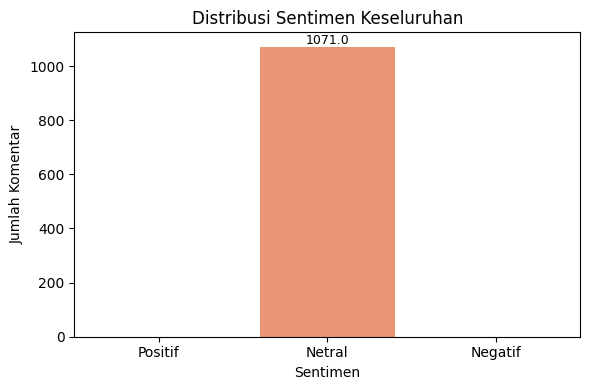

Proporsi sentimen keseluruhan (0-1):
sentiment_label
Positif    NaN
Netral     1.0
Negatif    NaN
Name: proportion, dtype: float64


In [23]:
plt.figure(figsize=(6, 4))
order = ["Positif", "Netral", "Negatif"]
ax = sns.countplot(x="sentiment_label", data=df, order=order, palette="Set2")
ax.set_title("Distribusi Sentimen Keseluruhan")
ax.set_xlabel("Sentimen")
ax.set_ylabel("Jumlah Komentar")
for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f"{height}",
        (p.get_x() + p.get_width() / 2., height),
        ha="center", va="bottom", fontsize=9
    )
plt.tight_layout()
plt.show()

# Also show normalized proportions
sentiment_prop = df["sentiment_label"].value_counts(normalize=True).reindex(order)
print("Proporsi sentimen keseluruhan (0-1):")
print(sentiment_prop)


# Insight

## Saham vs Bitcoin sentiment comparison

Jumlah komentar tentang 'saham': 14
Jumlah komentar tentang 'bitcoin/btc': 57


/tmp/ipython-input-1464979686.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="sentiment_label", data=saham_df, order=order, palette="Set2", ax=axes[0])
/tmp/ipython-input-1464979686.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="sentiment_label", data=bitcoin_df, order=order, palette="Set2", ax=axes[1])


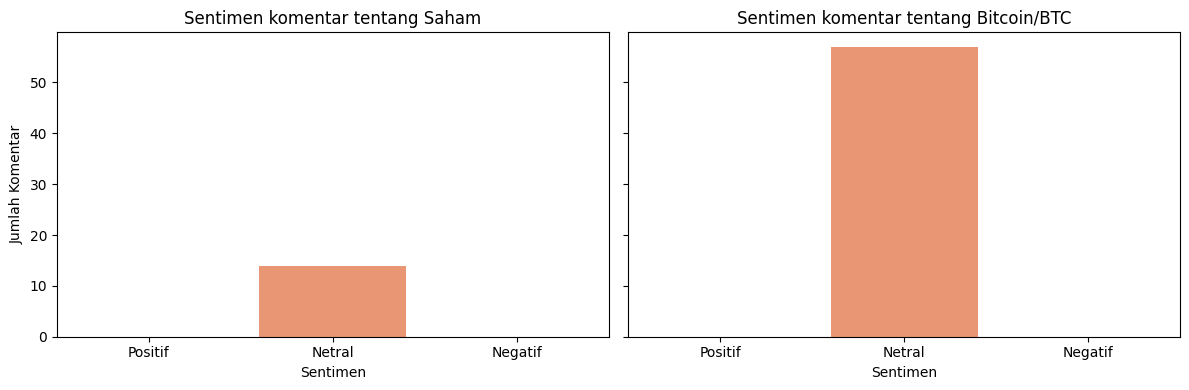


Proporsi sentimen pada komentar tentang SAHAM:
sentiment_label
Positif    NaN
Netral     1.0
Negatif    NaN
Name: proportion, dtype: float64

Proporsi sentimen pada komentar tentang BITCOIN/BTC:
sentiment_label
Positif    NaN
Netral     1.0
Negatif    NaN
Name: proportion, dtype: float64


In [24]:
# Filter comments that mention saham
mask_saham = df["clean_text"].str.contains(r"\bsaham\b", na=False)
# Filter comments that mention bitcoin or btc
mask_bitcoin = df["clean_text"].str.contains(r"\bbitcoin\b|\bbtc\b", na=False)

saham_df = df[mask_saham].copy()
bitcoin_df = df[mask_bitcoin].copy()

print(f"Jumlah komentar tentang 'saham': {len(saham_df)}")
print(f"Jumlah komentar tentang 'bitcoin/btc': {len(bitcoin_df)}")

fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)
order = ["Positif", "Netral", "Negatif"]

sns.countplot(x="sentiment_label", data=saham_df, order=order, palette="Set2", ax=axes[0])
axes[0].set_title("Sentimen komentar tentang Saham")
axes[0].set_xlabel("Sentimen")
axes[0].set_ylabel("Jumlah Komentar")

sns.countplot(x="sentiment_label", data=bitcoin_df, order=order, palette="Set2", ax=axes[1])
axes[1].set_title("Sentimen komentar tentang Bitcoin/BTC")
axes[1].set_xlabel("Sentimen")

plt.tight_layout()
plt.show()

print("\nProporsi sentimen pada komentar tentang SAHAM:")
print(saham_df["sentiment_label"].value_counts(normalize=True).reindex(order))

print("\nProporsi sentimen pada komentar tentang BITCOIN/BTC:")
print(bitcoin_df["sentiment_label"].value_counts(normalize=True).reindex(order))


## Frequent keywords / wordclouds by sentiment

In [25]:
# (Optional) very small stopword list to make keywords more meaningful
from typing import Any


stopwords_id = {
    "dan", "yang", "itu", "ini", "di", "ke", "dari", "untuk", "pada",
    "dengan", "sudah", "ada", "saja", "karena", "kalau", "jadi", "atau",
    "yg", "gak", "tidak", "ga", "tp", "tapi", "ku", "kau", "kamu", "saya",
}


def get_tokens(series):
    tokens = []
    for text in series.dropna():
        for tok in str(text).split():
            t = tok.strip()
            if t and t not in stopwords_id:
                tokens.append(t)
    return tokens


neg_tokens = get_tokens(df.loc[df["sentiment_label"] == "Negatif", "clean_text"])
pos_tokens = get_t[Any]okens(df.loc[df["sentiment_label"] == "Positif", "clean_text"])

neg_freq = Counter[Any](neg_tokens)
pos_freq = Counter[Any](pos_tokens)

print("Top 20 keywords (Negatif):")
print(neg_freq.most_common(20))

print("\nTop 20 keywords (Positif):")
print(pos_freq.most_common(20))

# WordClouds

def plot_wordcloud(counter, title):
    if not counter:
        print(f"Tidak ada kata untuk wordcloud: {title}")
        return
    wc = WordCloud(
        width=800,
        height=400,
        background_color="white"
    ).generate_from_frequencies(counter)
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(title)
    plt.show()


plot_wordcloud(neg_freq, "Wordcloud - Komentar Negatif")
plot_wordcloud(pos_freq, "Wordcloud - Komentar Positif")


SyntaxError: invalid syntax (ipython-input-1211204407.py, line 23)